In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM

from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
# Data comes from:
csv_path = "/content/drive/MyDrive/crypto/coin_Bitcoin.csv"


In [ ]:
df = pd.read_csv(csv_path, parse_dates=['Date'])

In [ ]:
df = df.sort_values('High')

In [ ]:
df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2910,2911,Bitcoin,BTC,2021-04-17 23:59:59,62572.176051,60361.352179,61529.920997,60683.821233,6.613876e+10,1.133882e+12
2909,2910,Bitcoin,BTC,2021-04-16 23:59:59,63594.720913,60222.532079,63258.505174,61572.789601,8.429301e+10,1.150457e+12
2906,2907,Bitcoin,BTC,2021-04-13 23:59:59,63742.283337,59869.956293,59890.017790,63503.457930,6.998345e+10,1.186364e+12
2908,2909,Bitcoin,BTC,2021-04-15 23:59:59,63821.672193,62208.964366,63075.196221,63314.010845,6.095438e+10,1.182945e+12
2907,2908,Bitcoin,BTC,2021-04-14 23:59:59,64863.098908,61554.796690,63523.754869,63109.695935,7.745178e+10,1.179061e+12


In [ ]:
df.shape

(2991, 10)

Text(0, 0.5, 'Close Price (USD)')

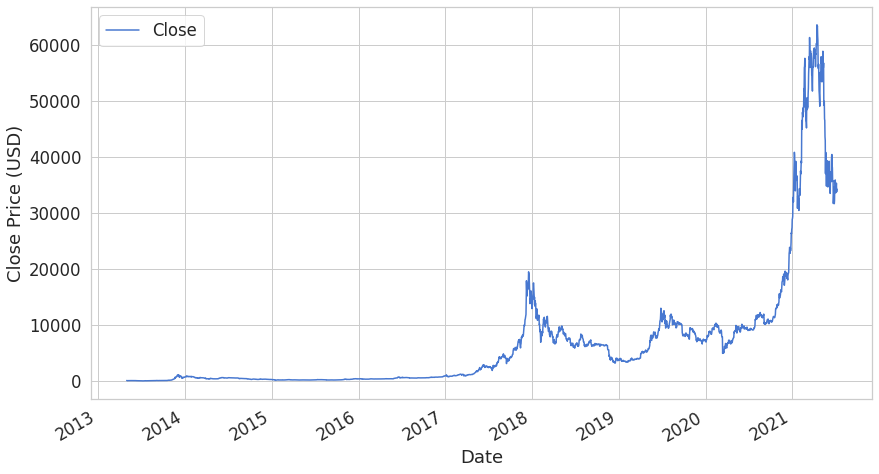

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

# Normalization

In [ ]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(2991, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [ ]:
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
np.isnan(scaled_close).any()

False

# Preprocessing

In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
y_train.shape

(2746, 1)

In [ ]:
X_train.shape

(2746, 99, 1)

In [ ]:
X_test.shape

(145, 99, 1)

In [ ]:
x_test_inverse = scaler.inverse_transform(X_test)

ValueError: ignored

In [ ]:
X_test[1]

array([[0.25867678],
       [0.25758274],
       [0.27368269],
       [0.2752197 ],
       [0.27346042],
       [0.27708627],
       [0.27822143],
       [0.28109499],
       [0.26099411],
       [0.27979273],
       [0.27805568],
       [0.28360471],
       [0.28547402],
       [0.26012394],
       [0.27958646],
       [0.28685353],
       [0.29140816],
       [0.28850893],
       [0.28841622],
       [0.29247065],
       [0.26928644],
       [0.29534512],
       [0.29280041],
       [0.30087163],
       [0.279156  ],
       [0.28773873],
       [0.30232845],
       [0.30161034],
       [0.3001344 ],
       [0.30024056],
       [0.30068485],
       [0.30388085],
       [0.29421742],
       [0.30146121],
       [0.29370737],
       [0.30501516],
       [0.30546164],
       [0.30628141],
       [0.30830607],
       [0.29533474],
       [0.30065991],
       [0.33486495],
       [0.36367179],
       [0.35842549],
       [0.37309858],
       [0.37384074],
       [0.36530155],
       [0.358

# Model

In [ ]:
DROPOUT = 0.3
WINDOW_SIZE = SEQ_LEN - 1

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(WINDOW_SIZE, X_train.shape[-1]))))
#model.add(Dropout(rate=DROPOUT))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=25, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/25
39/39 [==============================] - 10s 78ms/step - loss: 0.0013 - val_loss: 0.0083
Epoch 2/25
39/39 [==============================] - 1s 28ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 3/25
39/39 [==============================] - 1s 29ms/step - loss: 6.8977e-05 - val_loss: 6.2077e-04
Epoch 4/25
39/39 [==============================] - 1s 34ms/step - loss: 1.0166e-04 - val_loss: 0.0012
Epoch 5/25
39/39 [==============================] - 1s 35ms/step - loss: 2.8917e-04 - val_loss: 7.3035e-04
Epoch 6/25
39/39 [==============================] - 1s 34ms/step - loss: 1.6130e-04 - val_loss: 0.0015
Epoch 7/25
39/39 [==============================] - 1s 30ms/step - loss: 4.9677e-04 - val_loss: 0.0020
Epoch 8/25
39/39 [==============================] - 1s 29ms/step - loss: 5.8464e-05 - val_loss: 5.4784e-04
Epoch 9/25
39/39 [==============================] - 1s 31ms/step - loss: 7.1284e-05 - val_loss: 5.9461e-04
Epoch 10/25
39/39 [==============================] - 1s 29ms/ste

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.0018


0.0018266243860125542

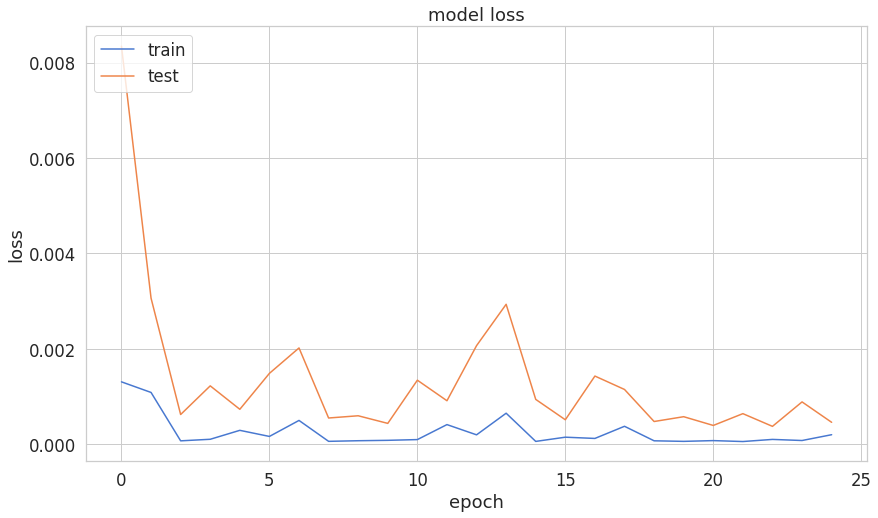

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

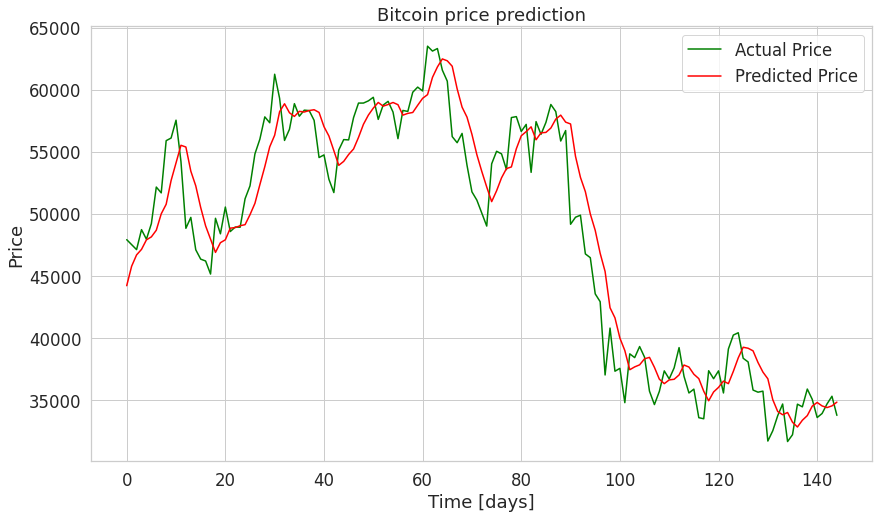

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
loaded_model = tf.keras.models.load_model('/content/crypto_model.h5')

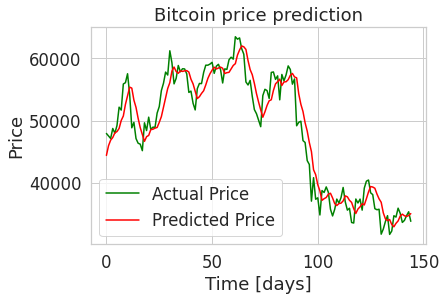

In [ ]:
y_hat = loaded_model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

INFO:tensorflow:Assets written to: ram://a525c5bd-d8ef-453b-8382-c6100d717543/assets


INFO:tensorflow:Assets written to: ram://a525c5bd-d8ef-453b-8382-c6100d717543/assets


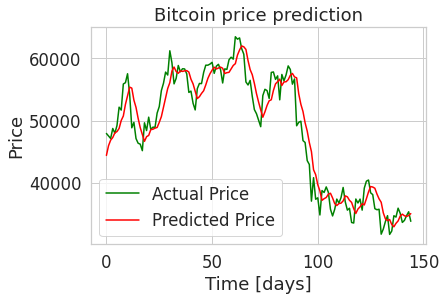

In [ ]:
import pickle

pickle.dump(loaded_model, open('crypto_model.pkl','wb'))

#Loading model to compare the results

model = pickle.load(open('crypto_model.pkl','rb'))

y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();